<a href="https://colab.research.google.com/github/SWETHASATHEES/NLP-project/blob/main/road_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset
df=pd.read_csv("/content/RTA Dataset.csv")
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [3]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [4]:
df.shape

(12316, 32)

In [5]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [6]:
df.describe(include='all')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

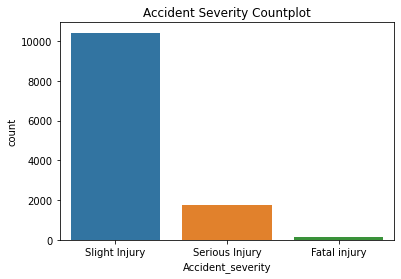

In [8]:
sns.countplot(df['Accident_severity'],data=df)
plt.title("Accident Severity Countplot")
plt.show()

In [9]:
df['Cause_of_accident'].value_counts()

No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: Cause_of_accident, dtype: int64

Text(0.5, 1.0, 'Cause of accident Countplot')

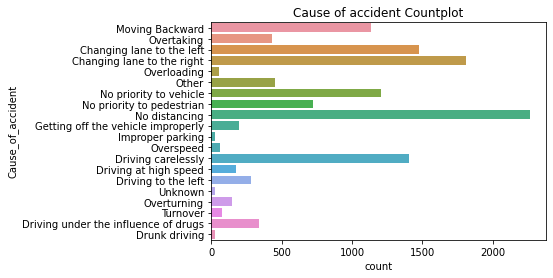

In [10]:
sns.countplot(y=df['Cause_of_accident'],data=df)
plt.title("Cause of accident Countplot")

In [11]:
df['Sex_of_driver'].value_counts()

Male       11437
Female       701
Unknown      178
Name: Sex_of_driver, dtype: int64

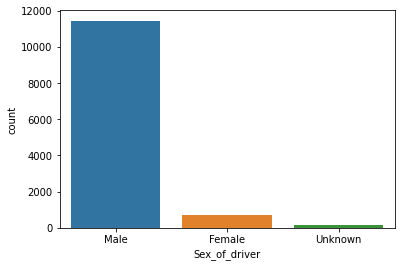

In [12]:
sns.countplot(df['Sex_of_driver'],data=df)

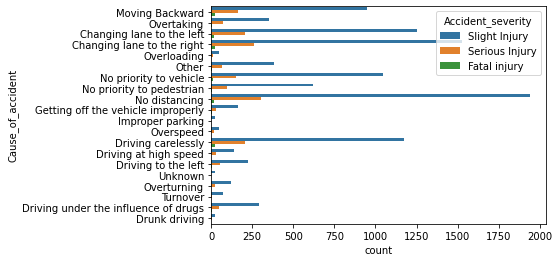

In [13]:
sns.countplot(y=df['Cause_of_accident'],hue=df['Accident_severity'])

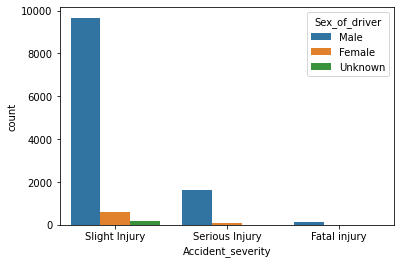

In [14]:
sns.countplot(df['Accident_severity'],hue=df['Sex_of_driver'])

In [15]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [16]:
#Droppping columns with more than 1000 missing values
df.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality','Fitness_of_casuality'],axis=1,inplace=True)
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,2,1,Going straight,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,Outside rural areas,...,1,1,Other,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [71]:
categorical_values=[i for i in df.columns if df[i].dtype=='object']
categorical_values

['Time',
 'Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Accident_severity']

In [18]:
for i in categorical_values:
  df[i].fillna(df[i].mode() [0],inplace=True)

In [19]:
df.isna().sum()  #No Missing Values

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

Countplot for categorical values

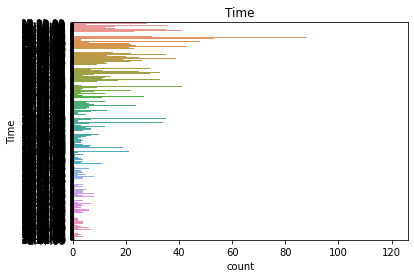

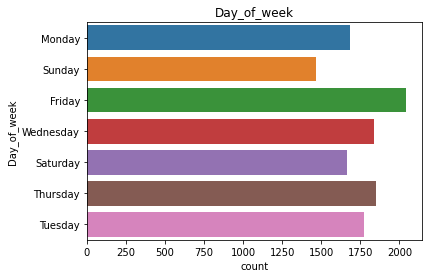

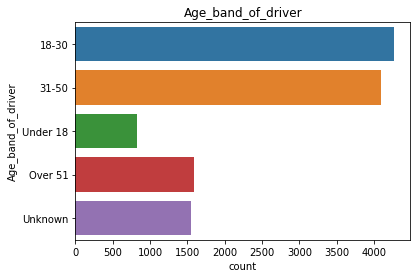

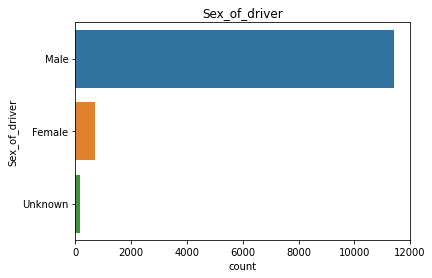

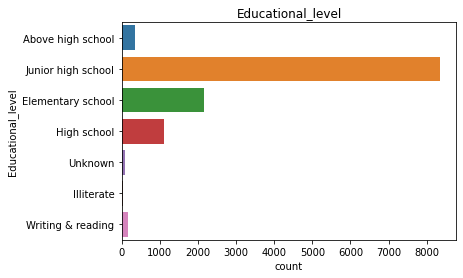

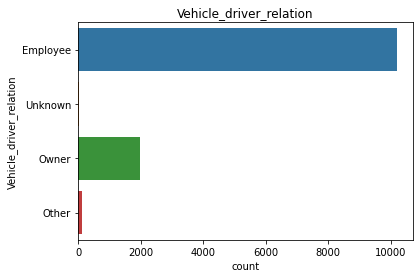

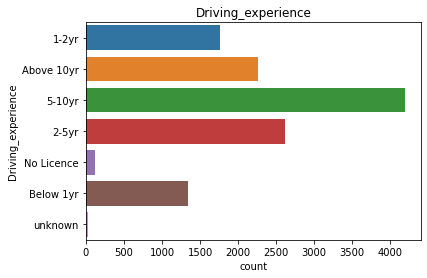

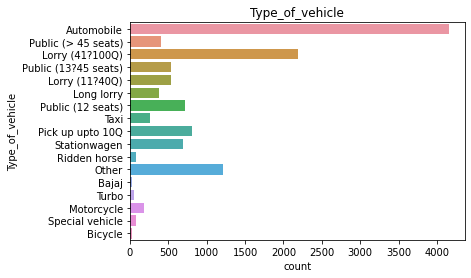

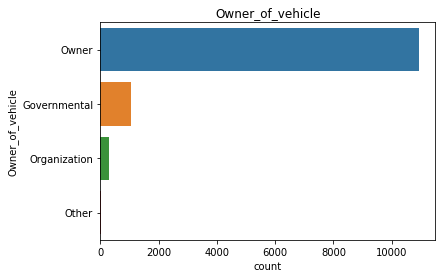

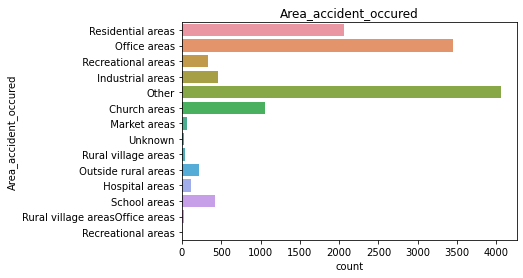

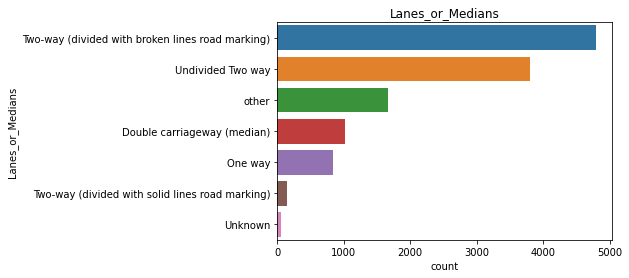

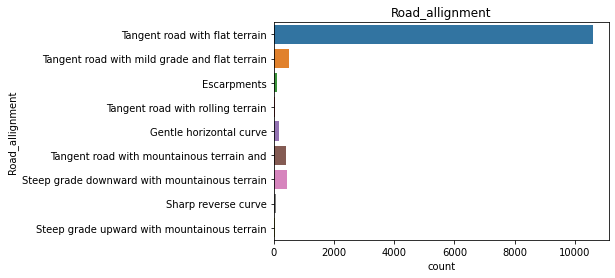

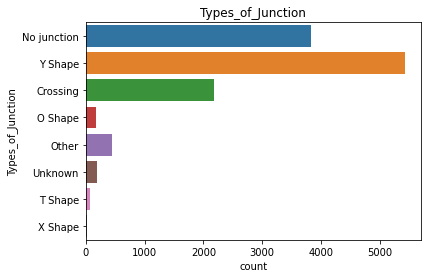

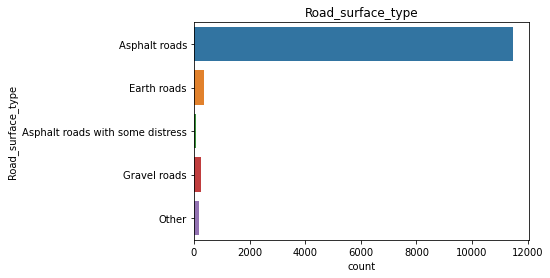

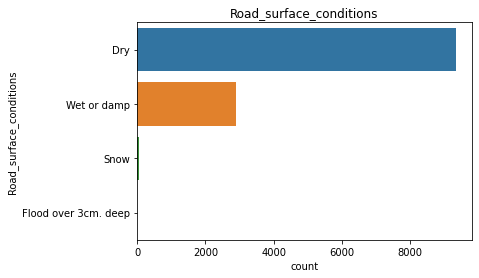

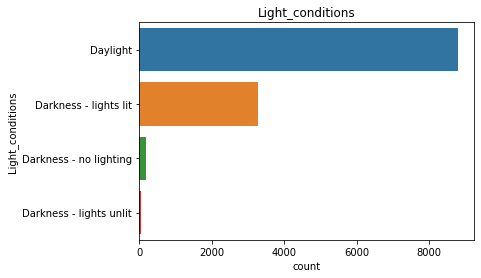

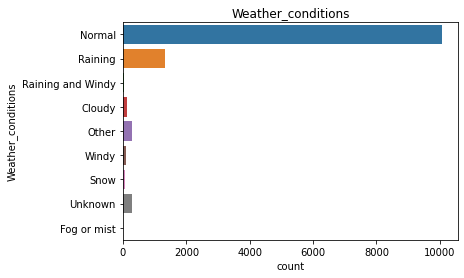

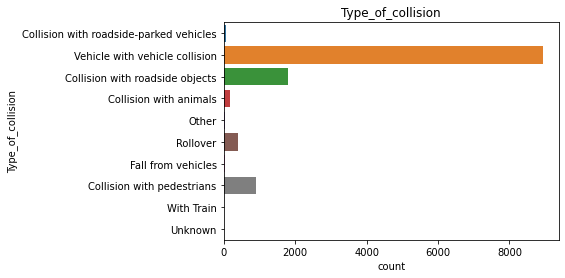

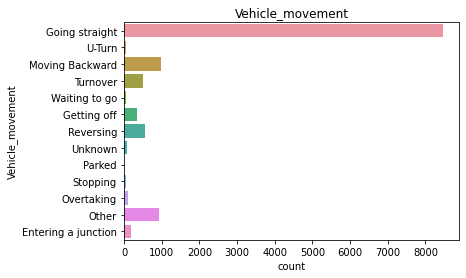

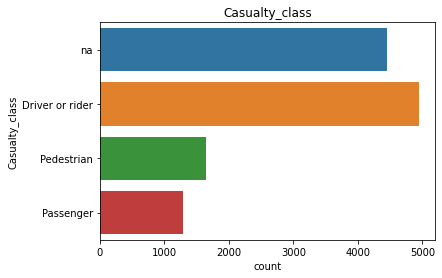

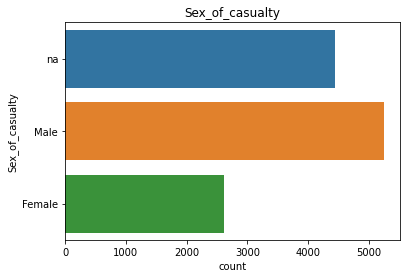

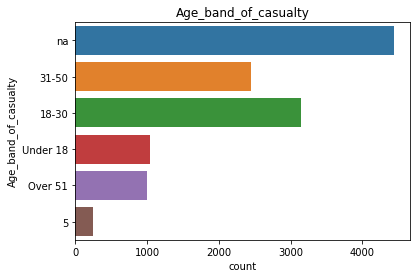

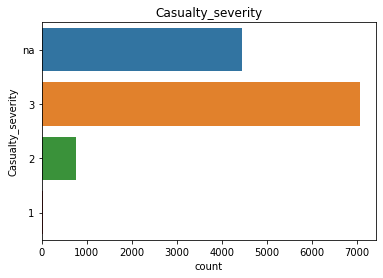

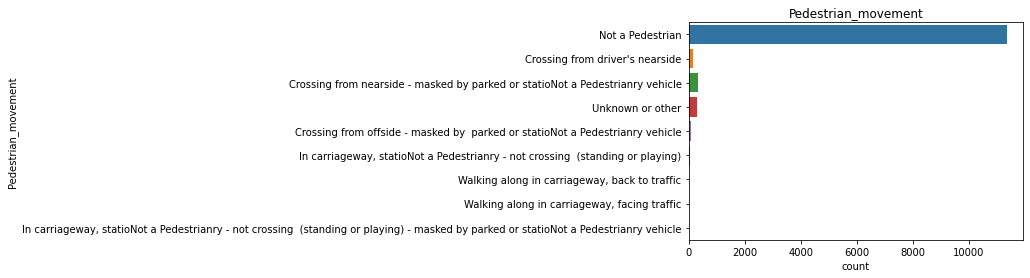

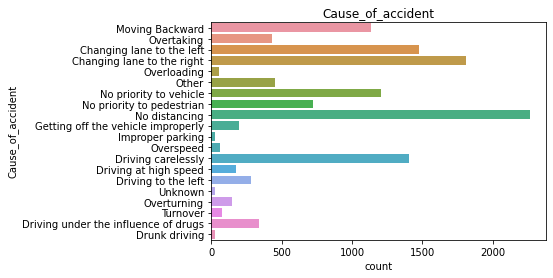

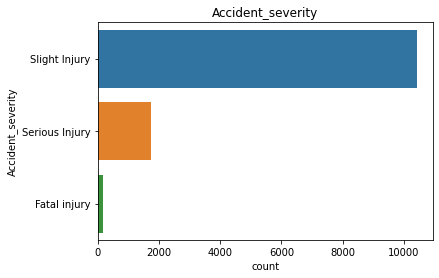

In [20]:
for i in categorical_values:
  sns.countplot(y=i,data=df)
  plt.title(i)
  plt.show()

In [21]:
numerical_values=[i for i in df.columns if df[i].dtype!='object']
numerical_values

['Number_of_vehicles_involved', 'Number_of_casualties']

In [22]:
for i in numerical_values:
  df[i].fillna(df[i].mean(),inplace=True)

In [23]:
df.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

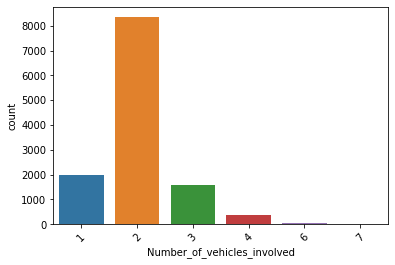

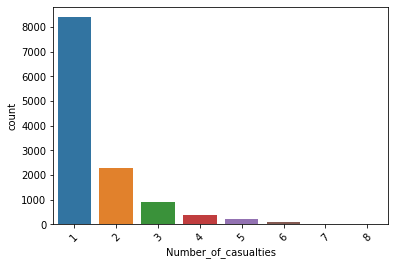

In [24]:
for i in numerical_values:
  sns.countplot(i,data=df)
  plt.xticks(rotation=45)
  plt.show()

In [25]:
#Checking correlation between numerical values
df.corr()

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


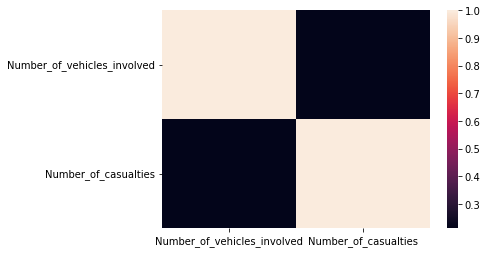

In [26]:
#Heatmap
sns.heatmap(df.corr())

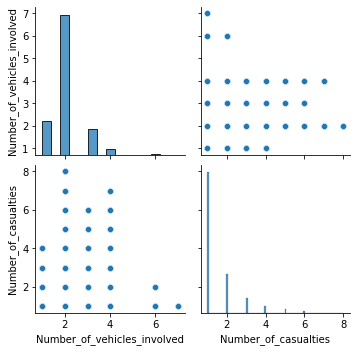

In [27]:
sns.pairplot(df)

In [28]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_severity              object
Pedestrian_movement            object
Cause_of_acc

In [29]:
columns=df.columns
columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [30]:
for i in columns:
  print("Column Name:",i)
  print(df[i])
  print("---------------------------")

Column Name: Time
0        17:02:00
1        17:02:00
2        17:02:00
3         1:06:00
4         1:06:00
           ...   
12311    16:15:00
12312    18:00:00
12313    13:55:00
12314    13:55:00
12315    13:55:00
Name: Time, Length: 12316, dtype: object
---------------------------
Column Name: Day_of_week
0           Monday
1           Monday
2           Monday
3           Sunday
4           Sunday
           ...    
12311    Wednesday
12312       Sunday
12313       Sunday
12314       Sunday
12315       Sunday
Name: Day_of_week, Length: 12316, dtype: object
---------------------------
Column Name: Age_band_of_driver
0          18-30
1          31-50
2          18-30
3          18-30
4          18-30
          ...   
12311      31-50
12312    Unknown
12313    Over 51
12314      18-30
12315      18-30
Name: Age_band_of_driver, Length: 12316, dtype: object
---------------------------
Column Name: Sex_of_driver
0          Male
1          Male
2          Male
3          Male
4          M

Label encoding categorical values

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#adding all categorical values column except the output=Áccidnet severity
df1=pd.DataFrame()
for i in categorical_values:
  if i!='Accident_severity':
    df1[i]=le.fit_transform(df[i])

In [38]:
df1

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
0,420,1,0,1,0,0,0,0,3,9,...,3,2,3,2,3,2,5,3,5,9
1,420,1,1,1,4,0,3,11,3,6,...,3,2,8,2,3,2,5,3,5,16
2,420,1,0,1,4,0,0,5,3,1,...,3,2,2,2,0,1,1,2,5,0
3,594,3,0,1,4,0,2,11,0,6,...,0,2,8,2,2,0,0,2,5,1
4,594,3,0,1,4,0,1,0,3,4,...,0,2,8,2,3,2,5,3,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,374,6,1,1,4,0,1,4,3,5,...,3,2,8,2,3,2,5,3,5,10
12312,476,3,4,1,1,0,2,0,3,5,...,3,2,8,4,3,2,5,3,5,10
12313,246,3,2,1,4,0,2,1,3,5,...,3,2,8,4,0,1,1,2,5,1
12314,246,3,0,0,4,0,3,5,3,6,...,0,2,8,4,3,2,5,3,5,5


In [39]:
df1.dtypes

Time                       int64
Day_of_week                int64
Age_band_of_driver         int64
Sex_of_driver              int64
Educational_level          int64
Vehicle_driver_relation    int64
Driving_experience         int64
Type_of_vehicle            int64
Owner_of_vehicle           int64
Area_accident_occured      int64
Lanes_or_Medians           int64
Road_allignment            int64
Types_of_Junction          int64
Road_surface_type          int64
Road_surface_conditions    int64
Light_conditions           int64
Weather_conditions         int64
Type_of_collision          int64
Vehicle_movement           int64
Casualty_class             int64
Sex_of_casualty            int64
Age_band_of_casualty       int64
Casualty_severity          int64
Pedestrian_movement        int64
Cause_of_accident          int64
dtype: object

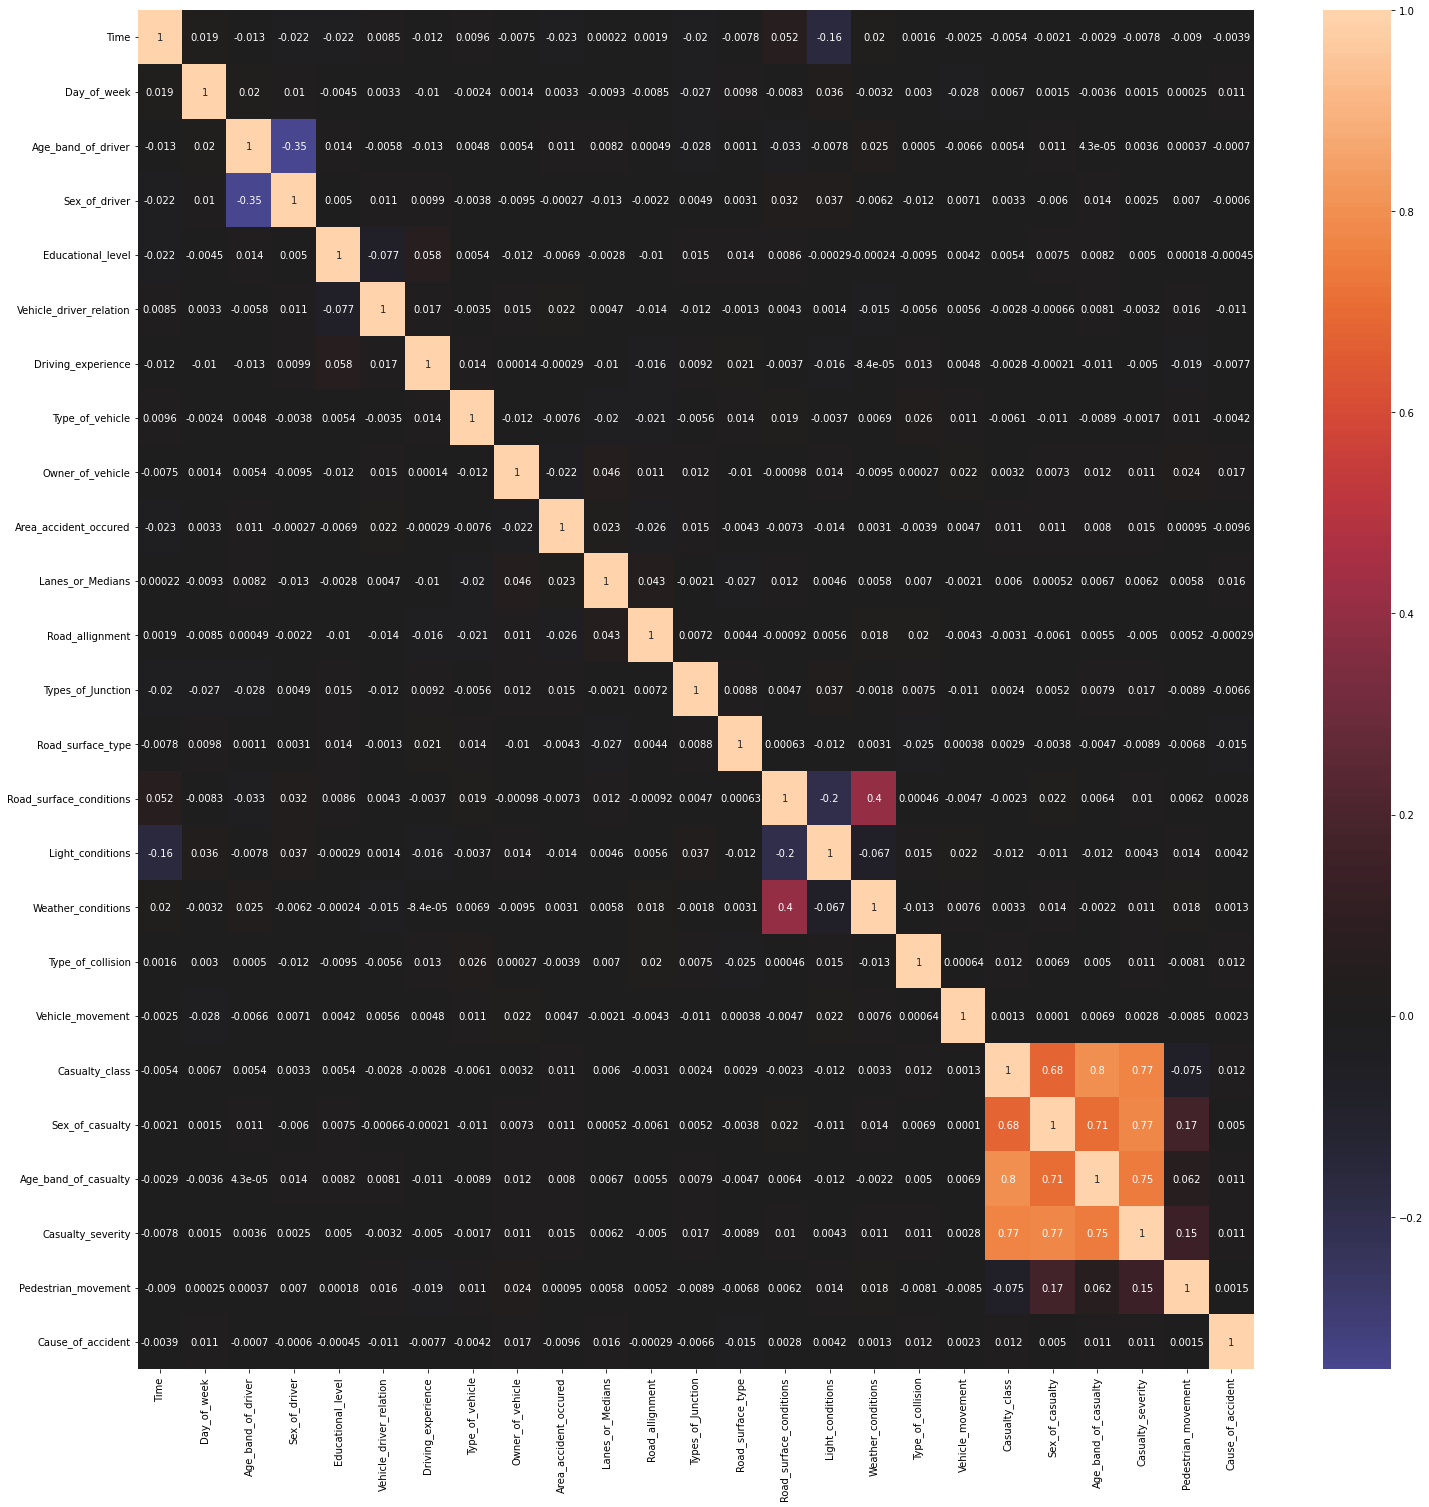

In [44]:
plt.figure(figsize=(25,25))
sns.heatmap(df1.corr(),center=0,annot=True)

 Chi-square test is a technique to determine the relationship between the categorical variables. The chi-square value is calculated between each feature and the target variable, and the desired number of features with the best chi-square value is selected.

In [ ]:
from sklearn.feature_selection import chi2
x=df1
y=df['Accident_severity']
f_p_score=chi2(x,y)
f_p_score

In [ ]:
#Creating a dataframe with p and f values
values=pd.DataFrame({'Features':x.columns,'F Score':f_p_score[0],'P Values':f_p_score[1]})
values.sort_values(by='F Score',ascending=True)

In [67]:
dfn=df.drop(['Time','Day_of_week','Type_of_vehicle','Owner_of_vehicle','Road_surface_conditions','Pedestrian_movement','Casualty_severity','Educational_level','Sex_of_driver','Road_allignment','Sex_of_casualty'],axis=1)
dfn.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Cause_of_accident,Accident_severity
0,18-30,Employee,1-2yr,Residential areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,Moving Backward,Slight Injury
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Overtaking,Slight Injury
2,18-30,Employee,1-2yr,Recreational areas,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,31-50,Changing lane to the left,Serious Injury
3,18-30,Employee,5-10yr,Office areas,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,18-30,Changing lane to the right,Slight Injury
4,18-30,Employee,2-5yr,Industrial areas,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Overtaking,Slight Injury


In [72]:
categorical_new=[i for i in dfn.columns if dfn[i].dtype=='object']
categorical_new

['Age_band_of_driver',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Types_of_Junction',
 'Road_surface_type',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_class',
 'Age_band_of_casualty',
 'Cause_of_accident',
 'Accident_severity']

In [76]:
for i in categorical_new:
  print("Column Name",i)
  print(dfn[i].value_counts())
  print("*"*50)

Column Name Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64
**************************************************
Column Name Vehicle_driver_relation
Employee    10206
Owner        1973
Other         123
Unknown        14
Name: Vehicle_driver_relation, dtype: int64
**************************************************
Column Name Driving_experience
5-10yr        4192
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: Driving_experience, dtype: int64
**************************************************
Column Name Area_accident_occured
Other                              4058
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas   

In [78]:
#Creating dummy
dummy=pd.get_dummies(dfn)
dummy

,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_driver_18-30,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Employee,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,...,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Accident_severity_Fatal injury,Accident_severity_Serious Injury,Accident_severity_Slight Injury
0,2,2,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,2,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2,2,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,2,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,2,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,2,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
12312,2,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
12313,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
12314,2,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [80]:
dfe=pd.concat([dfn,dummy],axis=1)
dfe

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,...,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Accident_severity_Fatal injury,Accident_severity_Serious Injury,Accident_severity_Slight Injury
0,18-30,Employee,1-2yr,Residential areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,...,0,0,0,0,0,0,0,0,0,1
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,...,0,0,0,1,0,0,0,0,0,1
2,18-30,Employee,1-2yr,Recreational areas,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,...,0,0,0,0,0,0,0,0,1,0
3,18-30,Employee,5-10yr,Office areas,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,...,0,0,0,0,0,0,0,0,0,1
4,18-30,Employee,2-5yr,Industrial areas,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Employee,2-5yr,Outside rural areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,...,0,0,0,0,0,0,0,0,0,1
12312,Unknown,Employee,5-10yr,Outside rural areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,...,0,0,0,0,0,0,0,0,0,1
12313,Over 51,Employee,5-10yr,Outside rural areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,...,0,0,0,0,0,0,0,0,1,0
12314,18-30,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,...,0,0,0,0,0,0,0,0,0,1


In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dummy,y,test_size=0.30,random_state=42)

In [85]:
#Model Creation
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

svm_model=SVC()
nb_model=MultinomialNB()
forest_model=RandomForestClassifier()
tree_model=DecisionTreeClassifier()
knn_model=KNeighborsClassifier(n_neighbors=5)
lst_model=[svm_model,nb_model,forest_model,tree_model,knn_model]

In [86]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
for i in lst_model:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("----------------------")
  print("Confusion Matrix")
  print("Accuracy Score",accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print("Classification Report")
  print(classification_report(y_test,y_pred))
  print("**************************************************************")

SVC()
----------------------
Confusion Matrix
Accuracy Score 1.0
[[  52    0    0]
 [   0  552    0]
 [   0    0 3091]]
Classification Report
                precision    recall  f1-score   support

  Fatal injury       1.00      1.00      1.00        52
Serious Injury       1.00      1.00      1.00       552
 Slight Injury       1.00      1.00      1.00      3091

      accuracy                           1.00      3695
     macro avg       1.00      1.00      1.00      3695
  weighted avg       1.00      1.00      1.00      3695

**************************************************************
MultinomialNB()
----------------------
Confusion Matrix
Accuracy Score 1.0
[[  52    0    0]
 [   0  552    0]
 [   0    0 3091]]
Classification Report
                precision    recall  f1-score   support

  Fatal injury       1.00      1.00      1.00        52
Serious Injury       1.00      1.00      1.00       552
 Slight Injury       1.00      1.00      1.00      3091

      accuracy        